### EN2550: Assignment 03 on Object Counting on a Conveyor Belt 
#### Connected Component Analysis 
In this part, we will generate an indexed image representing connected components in `conveyor_f101.png` image. Notice that, as there are three square nuts and one hexagonal nut in the image, there will be five connected components (backgound will be assigned the label 0). 

1. Open the `hexnut_template.png`, `squarenut_template.png` and `conveyor_f100.png` and display. 

In [3]:
import numpy as np 
import cv2 as cv 
import matplotlib.pyplot as plt 
%matplotlib inline 

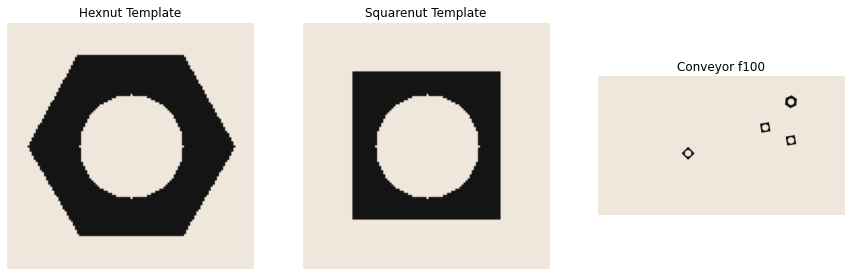

In [8]:
hexnut_template = cv.imread('hexnut_template.png', cv.IMREAD_COLOR)
squarenut_template =  cv.imread('squarenut_template.png', cv.IMREAD_COLOR)
conveyor_f100 =  cv.imread('conveyor_f100.png', cv.IMREAD_COLOR)

fig, ax = plt. subplots(1,3, figsize = (15, 5))
ax[0].imshow(cv.cvtColor(hexnut_template, cv.COLOR_RGB2BGR)); ax[0].axis('off'); ax[0].set_title("Hexnut Template") 
ax[1].imshow(cv.cvtColor(squarenut_template, cv.COLOR_RGB2BGR)); ax[1].axis('off'); ax[1].set_title("Squarenut Template") 
ax[2].imshow(cv.cvtColor(conveyor_f100, cv.COLOR_RGB2BGR)); ax[2].axis('off'); ax[2].set_title("Conveyor f100") 
plt.show() 

2. Convert the images to grayscale and apply **Otsu's thresholding** to obtain the binarized image. Do this for both the templates and belt images. See https://docs.opencv.org/master/d7/d4d/tutorial_py_thresholding.html for a guide. State the threshold value (automatically) selected in the operation. Display the output images. 

    **Problem Discussion** - 
    > Otsu's Thresholding is similar to simple binary thresholding, however, instead of giving the threshold value manually, Otsu's Thresholding calculates a suitable threshold value automatically, such that the two pixel value distributions seperated by the threshold will have the minimum standard variation values. 

In [54]:
def variance(start, end, hist): 
    "calculate the variance of the pixel value distribution from start index to end index" 
    if start == end: return 0 
    count = np.sum(hist[start:end]) 
    mean = np.sum([pixel_val * hist[pixel_val] for pixel_val in range(start, end)]) / count 
    var = np.sum([(pixel_val - mean)**2 * hist[pixel_val] for pixel_val in range(start, end)]) 
    return var 

def OtsuThresholding(img): 
    "perform Otsu's Thresholding on a given image" 
    # step 1 - convert the color img into a grayscale img 
    img = cv.cvtColor(img, cv.COLOR_BGR2GRAY) 

    # step 2 - finding the histogram of the grayscale img 
    hist = cv.calcHist([img], [0], None, [256], [0, 256]) 

    # step 3 - calculating the threshold value 
    min_total_var = np.inf 
    threshold = -1 
    for i in range(1, 256): 
        total_var = variance(0, i, hist) + variance(i, 256, hist) 
        if (total_var < min_total_var): 
            min_total_var = total_var
            threshold = i 
    # step 4 - verifying the threshold value 
    cv_threshold, img_ = cv.threshold(img, 127, 255, cv.THRESH_BINARY+cv.THRESH_OTSU)
    print("threshold = %d, automatic threshold = %g" %(threshold, cv_threshold)) 

    # step 5 - performing simple thresholding 
    threshold, thresholded_img = cv.threshold(img, threshold, 255, cv.THRESH_BINARY_INV) 
    return thresholded_img 

C:\Users\HI\AppData\Local\Temp/ipykernel_4032/2049372574.py:5: RuntimeWarning: invalid value encountered in float_scalars
  mean = np.sum([pixel_val * hist[pixel_val] for pixel_val in range(start, end)]) / count


threshold = 21, automatic threshold = 20
threshold = 21, automatic threshold = 20
threshold = 21, automatic threshold = 20


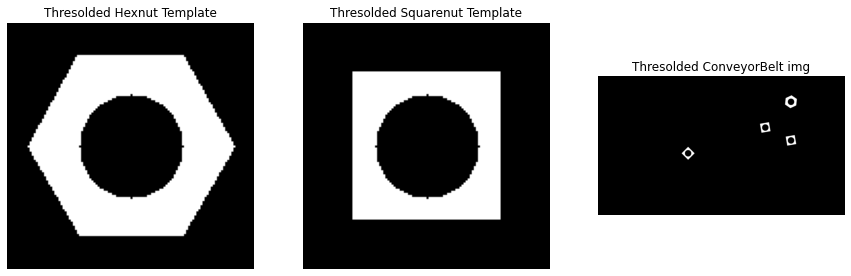

In [55]:
imgs = [OtsuThresholding(hexnut_template), OtsuThresholding(squarenut_template), OtsuThresholding(conveyor_f100)] 
titles = ["Thresolded Hexnut Template", "Thresolded Squarenut Template", "Thresolded ConveyorBelt img"] 

fig, ax = plt.subplots(1, len(imgs), figsize = (15, 5))
for i in range(len(imgs)): 
    ax[i].imshow(imgs[i], cmap='gray'); ax[i].axis('off'); ax[i].set_title(titles[i]) 

3. Carry out **morphological closing** to remove small holes inside the foreground. Use a 3×3 kernel. See https://docs.opencv.org/master/d9/d61/tutorial_py_morphological_ops.html for a guide. 

    **Problem Discussion** - 
    > - Notice that, here in this images, ***the foreground is in white and the background is in black***. 
    > - Therefore, to remove the black holes in the white foreground, we have to perform ***morphological closing; firstly dilation then erosion***. 
    > - In morphological closing, the first dilation operation will enlargen the white colored regions, thus removing the black spots/holes in the white foreground. Then, the second erosion operation will recover black background regions covered by white after dilation. 
    > - In this manner, we can remove the black noises in the white foreground, while keeping the foreground and background areas mostly unchanged. 

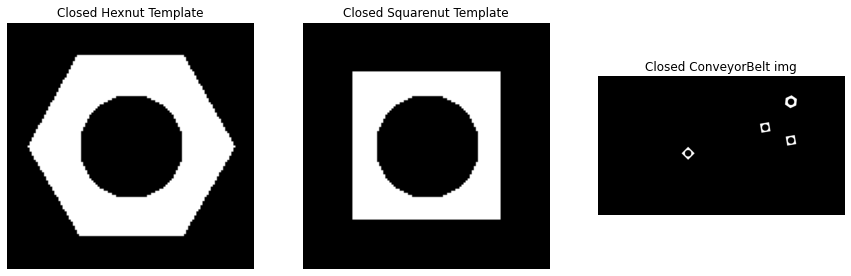

In [56]:
kernel = np.ones((3, 3), dtype=np.uint8) 
closed_imgs = [] 
for img in imgs: 
    closed_img = cv.morphologyEx(img, cv.MORPH_CLOSE, kernel) # performing morphographical opening on images 
    closed_imgs.append(closed_img) 
titles = ["Closed Hexnut Template", "Closed Squarenut Template", "Closed ConveyorBelt img"] 

fig, ax = plt.subplots(1, len(closed_imgs), figsize = (15, 5))
for i in range(len(closed_imgs)): 
    ax[i].imshow(closed_imgs[i], cmap='gray'); ax[i].axis('off'); ax[i].set_title(titles[i]) 

4. Connected components analysis: apply the connectedComponentsWithStats function (see https://docs.opencv.org/4.5.5/d3/dc0/group__imgproc__shape.html#ga107a78bf7cd25dec05fb4dfc5c9e765f) and display the outputs as colormapped images. 

Text(0.5, 1.0, 'Connected Components in Hexnut Template')

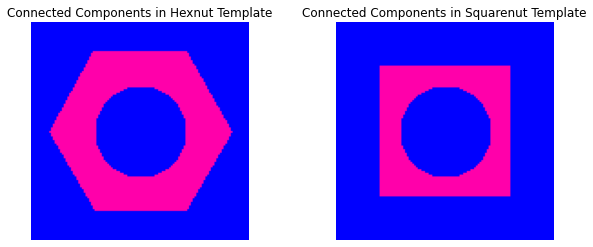

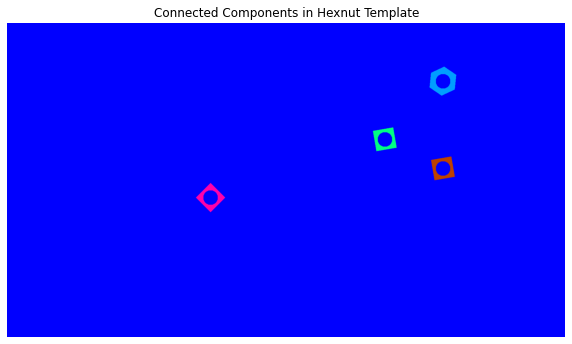

In [62]:
# connected component analysis 
colormapped_imgs = [] 
info = [] 
for i, img in enumerate(closed_imgs): 
    retval, labels, stats, centroids = cv.connectedComponentsWithStats(img) 
    colormapped_img = cv.applyColorMap((labels/np.amax(labels) * 255).astype(np.uint8), cv.COLORMAP_RAINBOW) 
    colormapped_imgs.append(colormapped_img) 
    info.append([retval, labels, stats, centroids])

titles = ["Connected Components in Hexnut Template", "Connected Components in Squarenut Template", "Connected Components in ConveyorBelt img"] 
fig1, ax1 = plt.subplots(1, 2, figsize = (10, 4)) 
ax1[0].imshow(colormapped_imgs[0]); ax1[0].axis('off'); ax1[0].set_title(titles[0]) 
ax1[1].imshow(colormapped_imgs[1]); ax1[1].axis('off'); ax1[1].set_title(titles[1]) 
fig2, ax2 = plt.subplots(1, 1, figsize = (10, 6)) 
ax2.imshow(colormapped_imgs[2]); ax2.axis('off'); ax2.set_title(titles[0]) 

* ##### How many connected components are detected in each image? 
> - In each of the hexnut and squarenut templates, we have two connected components; (black) background (label=0) and foreground/object (label = 1). 
> - There are 5 connected components in the conveyor-belt image; background, 1 hexnut, and 3 squarenuts. 

In [72]:
for i in range(len(colormapped_imgs)): 
    retval = info[i][0] 
    print("for the", titles[i].split()[3], "image \n     no.of connected components =", retval) 

for the Hexnut image 
     no.of connected components = 2
for the Squarenut image 
     no.of connected components = 2
for the ConveyorBelt image 
     no.of connected components = 5


- ##### What are the statistics? Interpret these statistics. 
> * 'statistics' is a 2D array where each row corresponds to one connected component in the image. 
> * There are 5 statistics values in each row. 
> * The first two values are the coordinates (x, y) of the top-left corner of the bounding box of the object. 
> * The third and fourth values show the width (along x-axis) and height (along y-axis) of the bounding box respectively. 
> * The fifth or last value is the area of the connected component given in pixels. 

Let us verify the area of the hexnut as mentioned in the problem. (For the hexnut template, you should get the object area in pixel as approximately 4728.)

In [73]:
hexnut_info = info[0] 
hexnut_stats = hexnut_info[2] 
area = hexnut_stats[1][4] 
print("area of the hexnut object = %d" %area)

area of the hexnut object = 4728


- ##### What are the centroids? 
> * centroid of a connected component is the centroid/center of the object which is obtained by treating each pixel as equally weighted points. 

Let us carry out a manual calculation and verify the solution. 

In [83]:
# consider the hexnut object 
hexnut = info[0][1] 
height, width = hexnut_template.shape[:2] 
centroid_x = np.sum(hexnut * np.arange(0, width, 1)) / area 
centroid_y = np.sum(hexnut.T * np.arange(0, height, 1)) / area 
print("manually calculated centroid = [%f, %f]" %(centroid_x, centroid_y)) 
print("centroid given by opencv =", info[0][3][1]) 

manually calculated centroid = [59.833756, 59.223562]
centroid given by opencv = [59.83375635 59.22356176]


In [74]:
for i in range(len(colormapped_imgs)): 
    retval, labels, stats, centroids = info[i] 
    print("\n ****** for the", titles[i].split()[3], "image : *******") 
    print("    no. of connected components = %d" %retval) 
for j in range(retval): 
    if j == 0: print("for the background") 
    else: print("for connected component %d" %j) 
    print("    statistics -- bounding box - top left corner = (%d, %d), width = %d, height = %d, area = %d" %(stats[j][0], stats[j][1], stats[j][2], stats[j][3], stats[j][4])) 
    print("    centroid = (%f, %f)" %(centroids[j][0], centroids[j][1]))


 ****** for the Hexnut image : *******
    no. of connected components = 2

 ****** for the Squarenut image : *******
    no. of connected components = 2

 ****** for the ConveyorBelt image : *******
    no. of connected components = 5
for the background
    statistics -- bounding box - top left corner = (0, 0), width = 1920, height = 1080, area = 2059646
    centroid = (957.363235, 540.444163)
for connected component 1
    statistics -- bounding box - top left corner = (1454, 150), width = 92, height = 100, area = 4636
    centroid = (1499.242019, 199.285160)
for connected component 2
    statistics -- bounding box - top left corner = (1259, 359), width = 82, height = 82, area = 3087
    centroid = (1299.183026, 399.183026)
for connected component 3
    statistics -- bounding box - top left corner = (1459, 459), width = 82, height = 82, area = 3087
    centroid = (1499.183026, 499.183026)
for connected component 4
    statistics -- bounding box - top left corner = (650, 550), width =